# Exporación de los datos

In [2]:
%pip install pandas numpy matplotlib seaborn scikit-learn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 3.7 MB/s  0:00:03m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 4.1 MB/s  0:00:04m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 4.2 MB/s  0:00:02m0:00:0100:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 4.5 MB/s  0:00:02 eta 0:00:01
Using cached cycler-0.12.1-py3

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [24]:
def read_data(file_path):
    """
    Reads a CSV file and returns a DataFrame.
    
    Parameters:
    file_path (str): The path to the CSV file.
    
    Returns:
    pd.DataFrame: The DataFrame containing the data.
    """
    try:
        # Try reading with UTF-8 encoding first
        return pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        # If UTF-8 fails, try with latin-1 encoding
        print(f"UTF-8 encoding failed for {file_path}, trying latin-1...")
        return pd.read_csv(file_path, encoding='latin-1')

def display_data_info(df):
    """
    Displays basic information about the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.
    """
    print("DataFrame Info:")
    print(df.info())
    print("DataFrame Description:")
    print(df.describe())
    print("DataFrame Missing Values:")
    print(df.isna().sum())
    print("\nFirst 2 rows:")
    print(df.head(2))

In [27]:
data_path = os.path.join(os.getcwd(), "data")
dfs = {}
for file in os.listdir(data_path):
    if file.endswith(".csv"):
        file_path = os.path.join(data_path, file)
        print(f"Processing file: {file}")
        df = read_data(file_path)
        display_data_info(df)
        dfs[file] = df

Processing file: producto.csv
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12026 entries, 0 to 12025
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            12026 non-null  int64  
 1   categoria_id  10998 non-null  float64
 2   nombre        12026 non-null  object 
 3   marca_id      11150 non-null  float64
 4   volumen       12026 non-null  int64  
 5   precio        12020 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 563.8+ KB
None
DataFrame Description:
                  id  categoria_id      marca_id        volumen        precio
count   12026.000000  10998.000000  11150.000000   12026.000000  12020.000000
mean   233928.299850     23.148663     41.812735    1033.562448     38.770502
std    133810.910123     20.469181     62.779059    4717.072506    309.980074
min        15.000000      1.000000      1.000000       0.000000      0.000000
25%    117674.750000

In [28]:
for key, df in dfs.items():
    print(f"File: {key}")
    print(df.drop_duplicates().shape[0], df.shape[0])

File: producto.csv
12026 12026
File: categoria.csv
101 101
File: marca.csv
307 307
File: events.csv
2755641 2756101
File: cliente.csv
11720 12000


In [31]:
def display_distributions_stats(df):
    """
    Displays the distribution of numerical columns in the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.
    """
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    for col in numerical_cols:
        if not re.search(r'(id|timestamp)', col):
            plt.figure(figsize=(10, 5))
            sns.histplot(df[col], kde=True)
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.show()
    not_numerical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
    for col in not_numerical_cols:
        if not re.search(r'(nombre|apellido|correo|telefono)', col):
            plt.figure(figsize=(10, 5))
            sns.countplot(y=df[col])
            plt.title(f'Distribution of {col}')
            plt.xlabel('Count')
            plt.ylabel(col)
            plt.show()

File: producto.csv


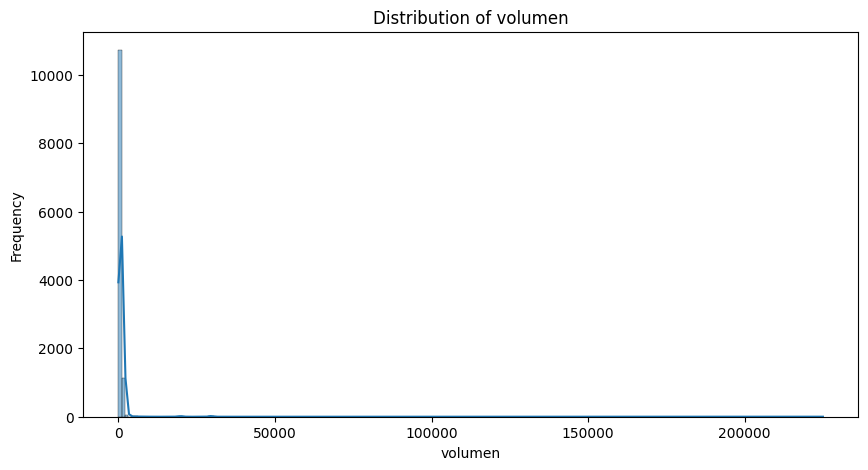

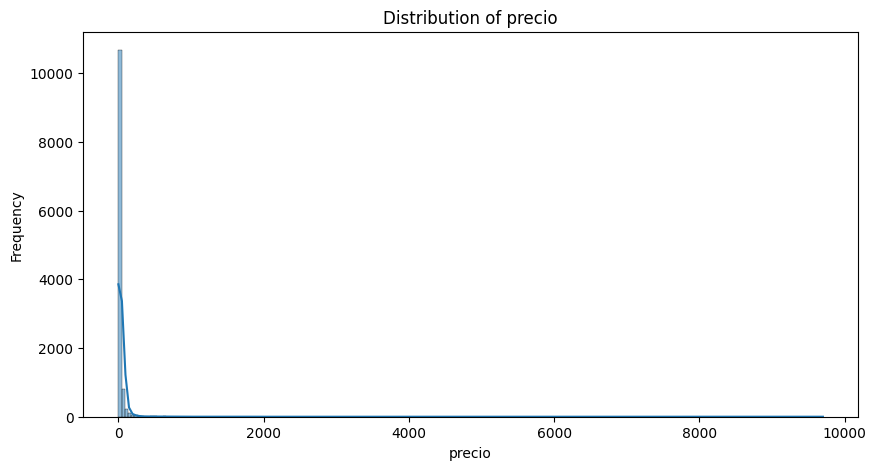

File: categoria.csv


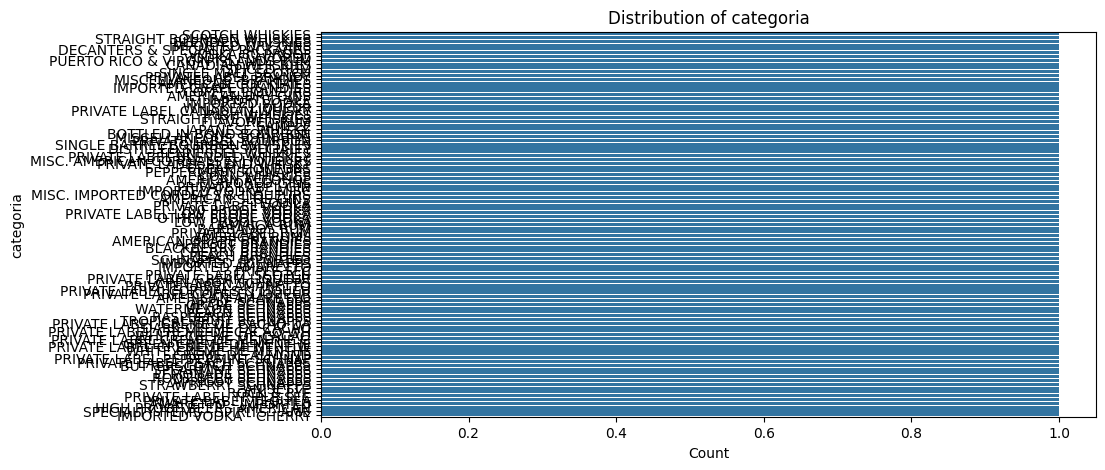

File: marca.csv


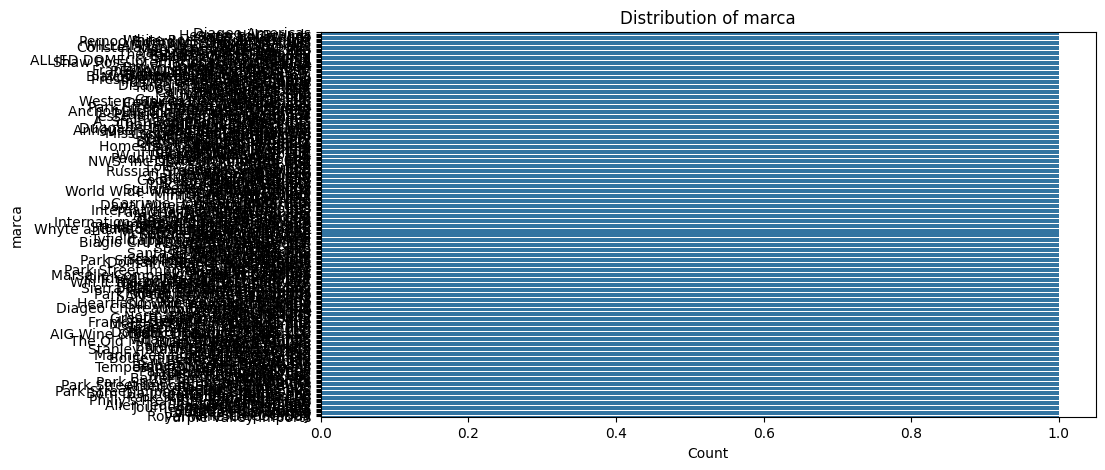

File: events.csv


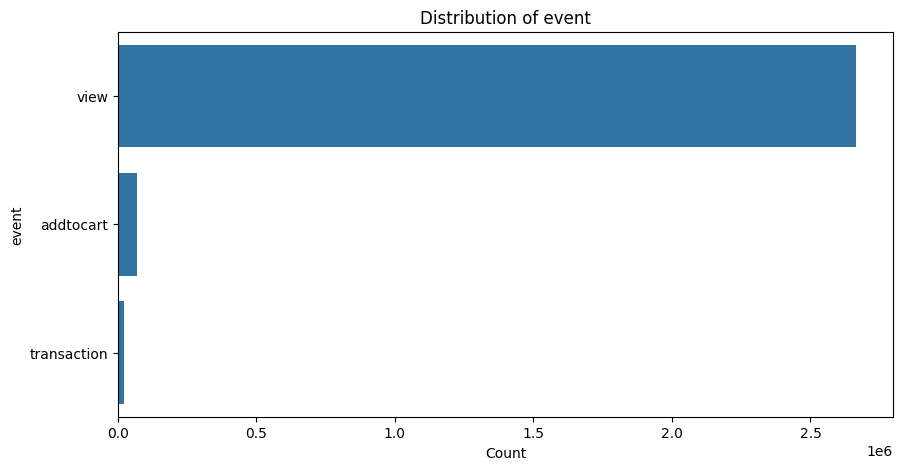

File: cliente.csv


KeyboardInterrupt: 

In [ ]:
for key, df in dfs.items():
    print(f"File: {key}")
    display_distributions_stats(df)

File: producto.csv


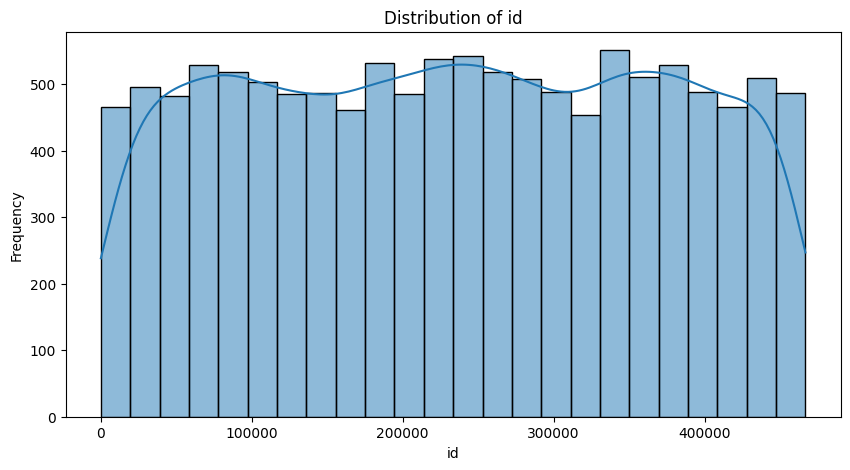

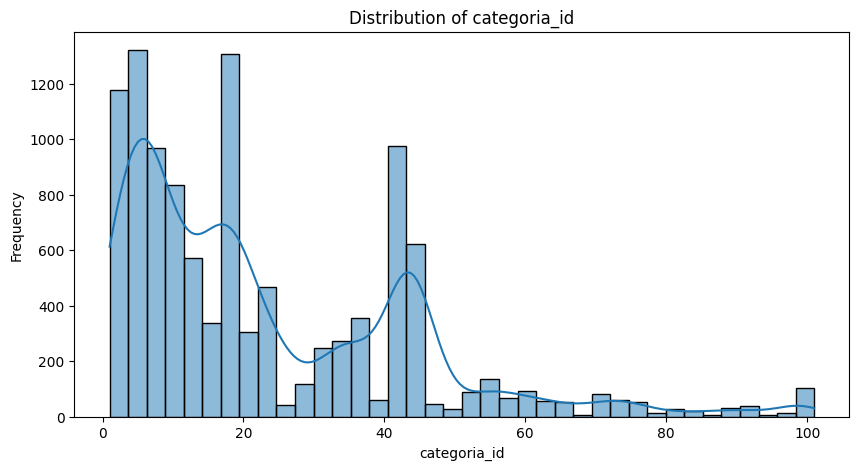

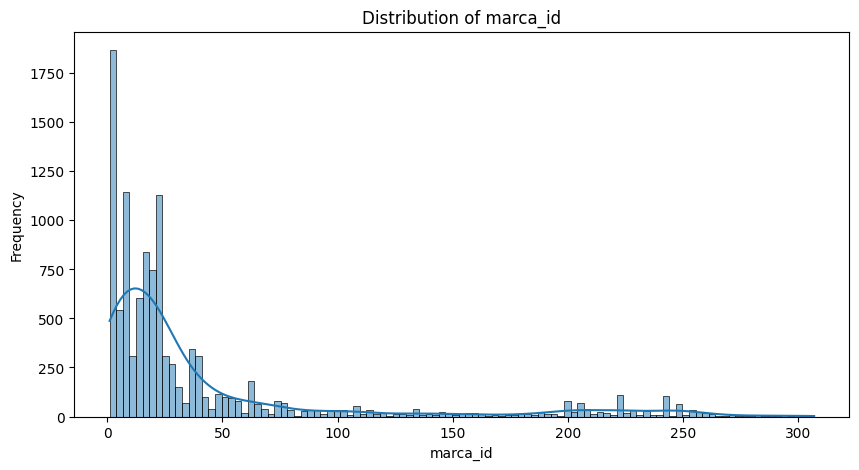

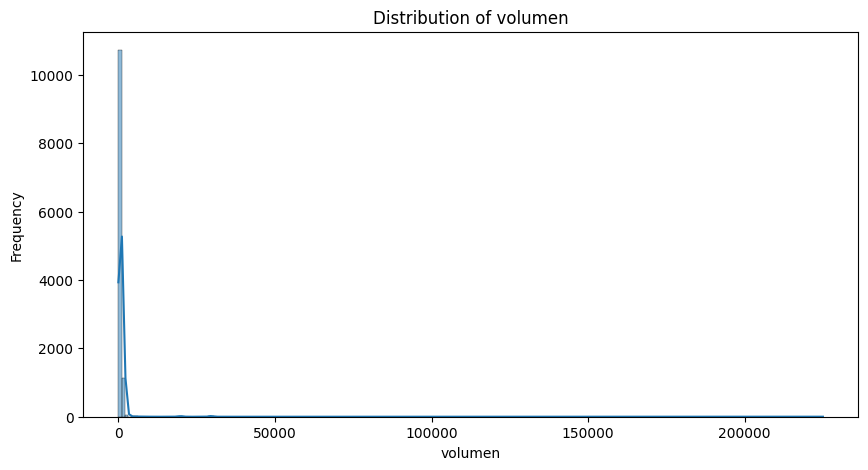

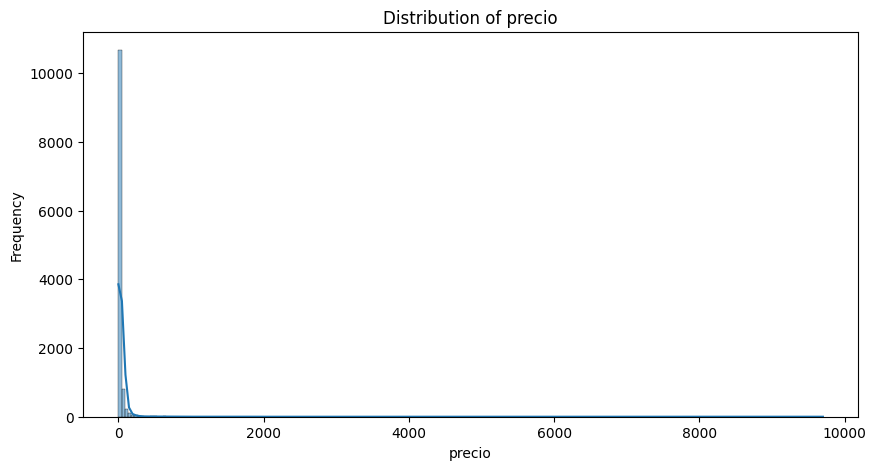

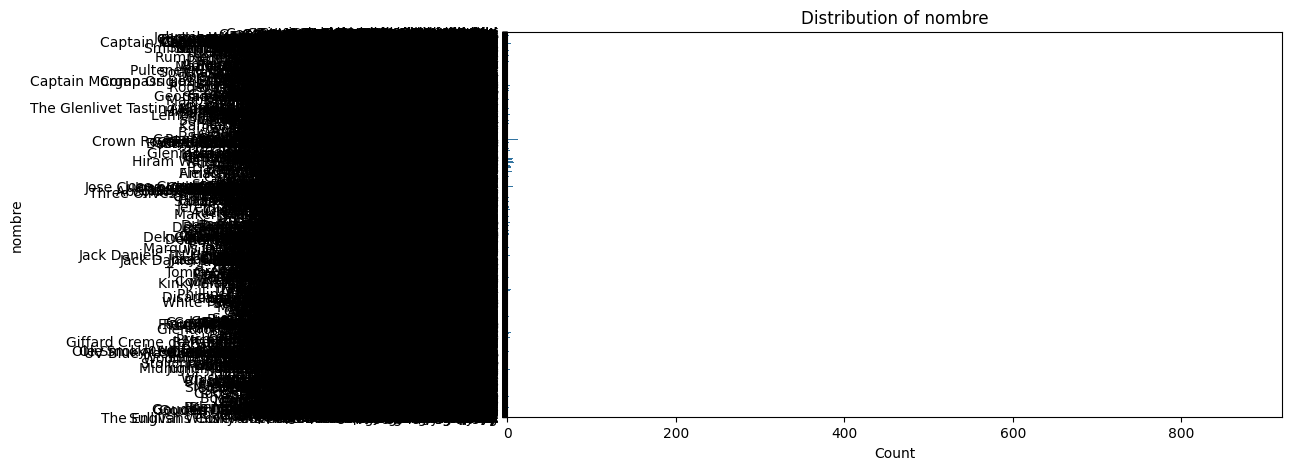

File: categoria.csv


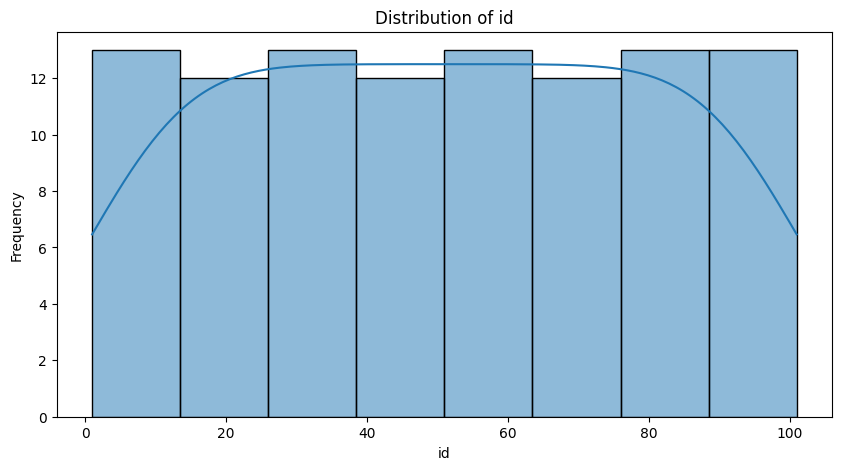

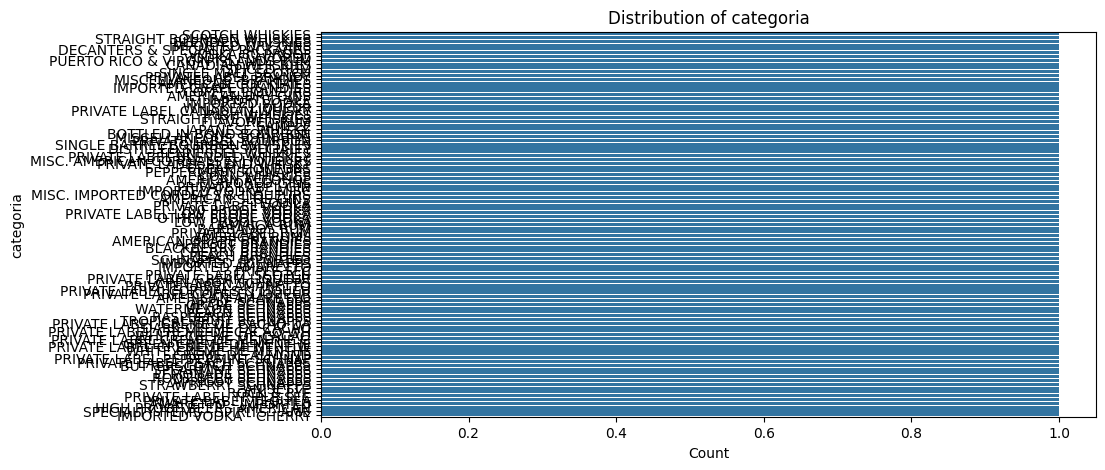

File: marca.csv


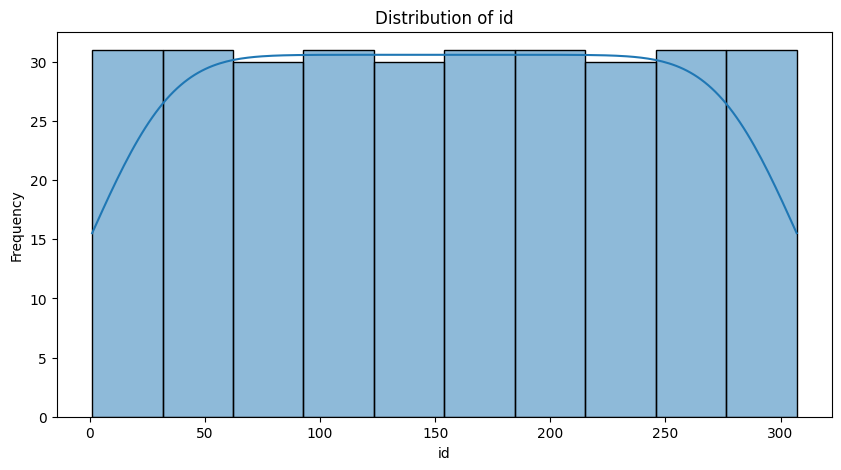

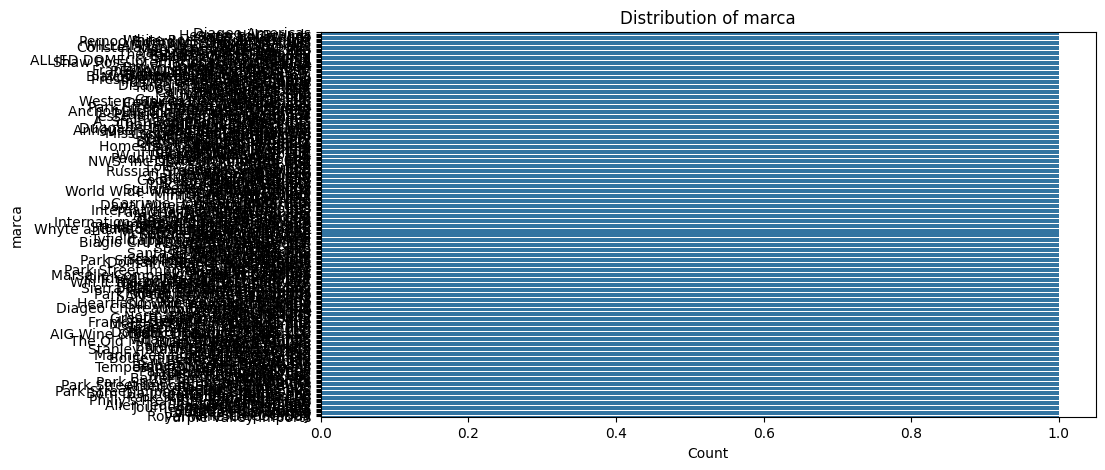

File: events.csv


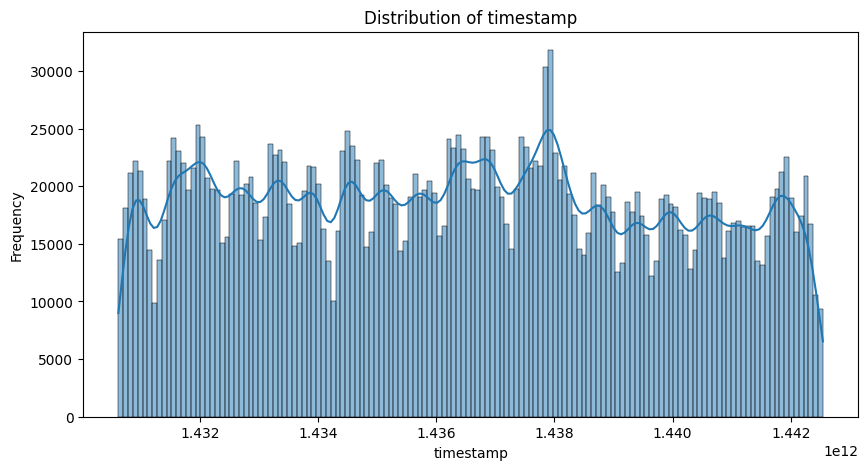

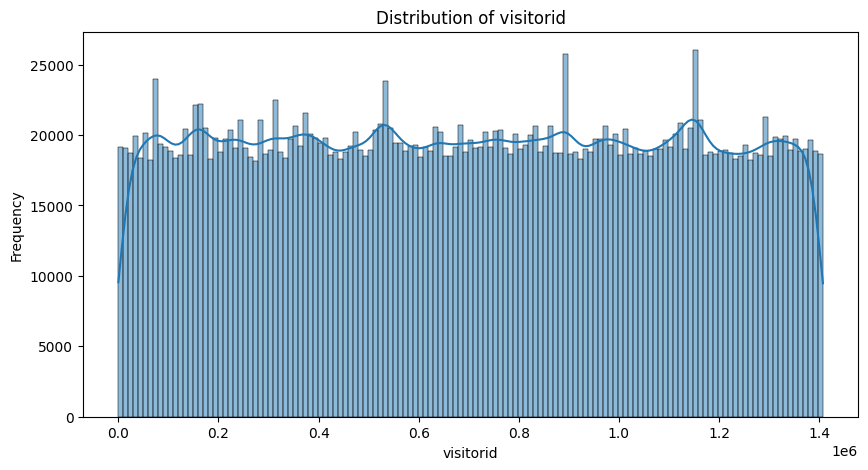

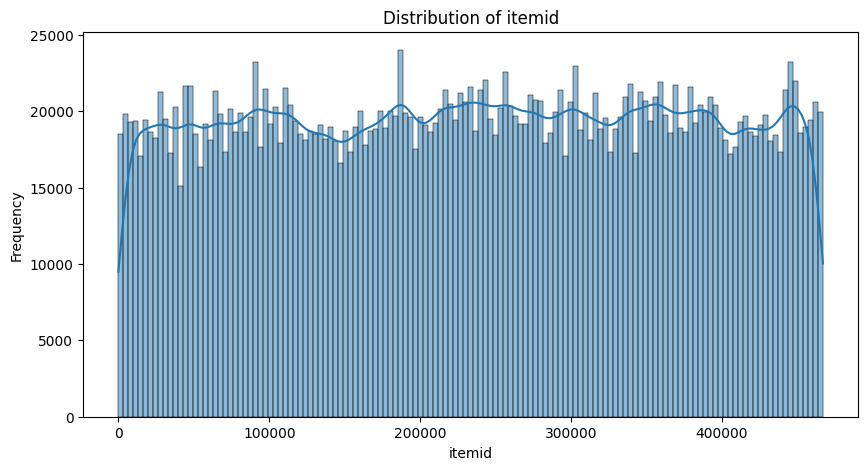

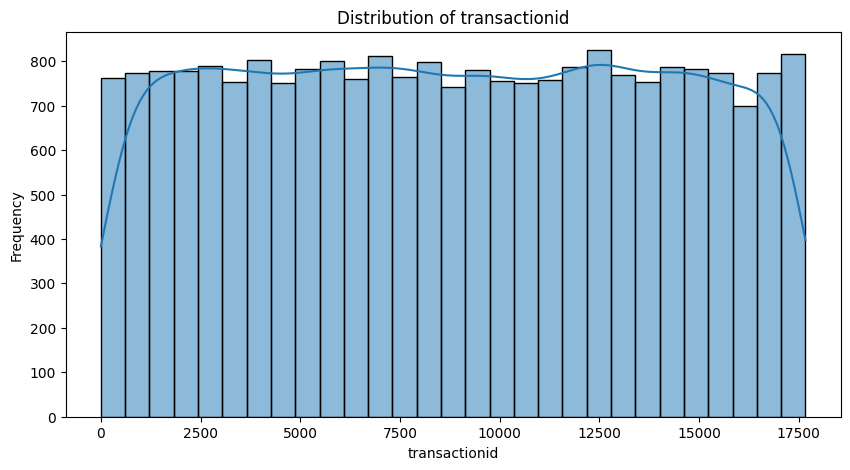

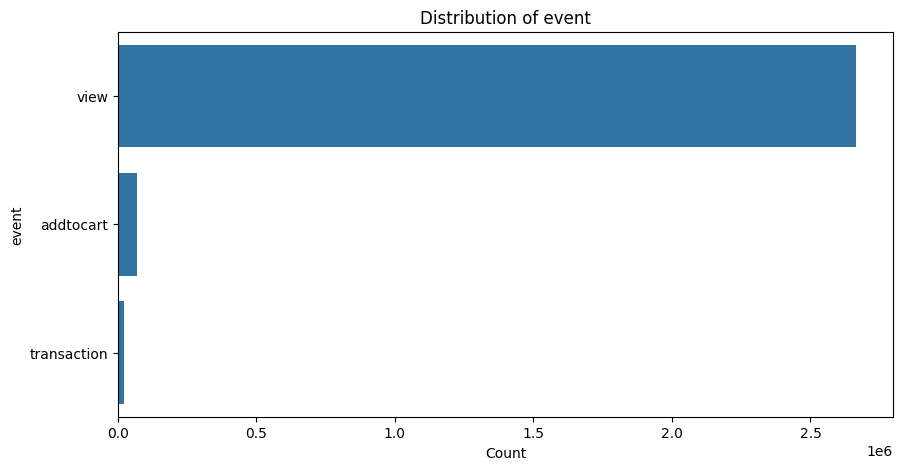

File: cliente.csv


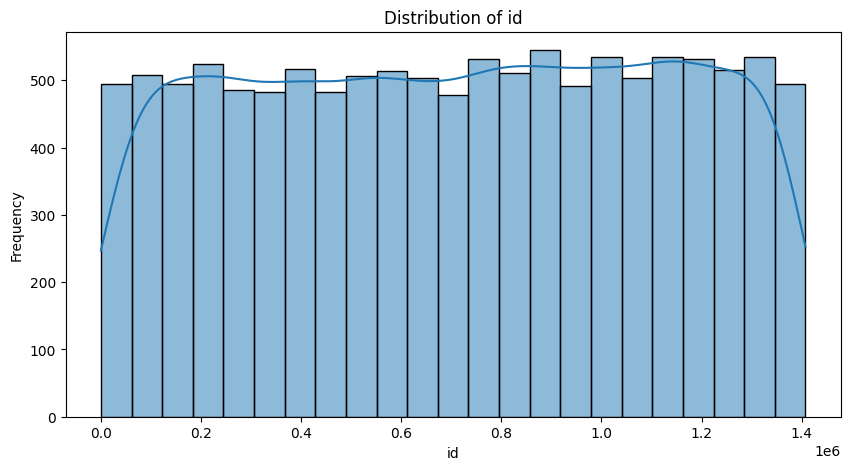

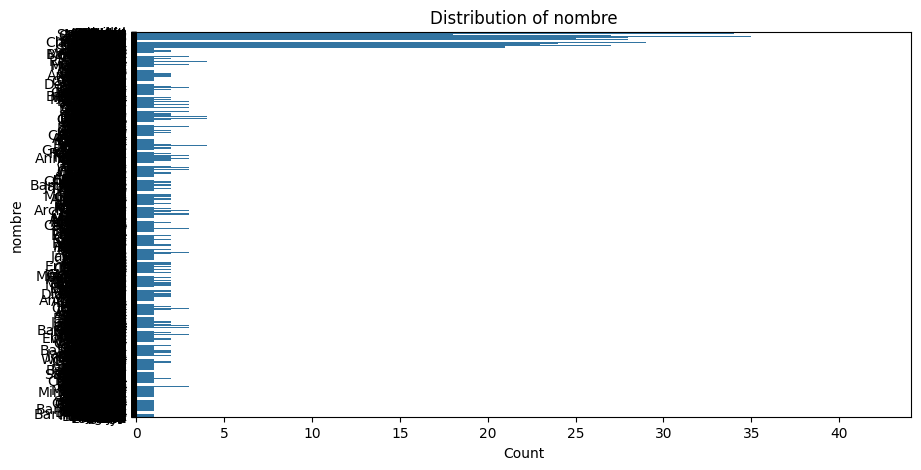

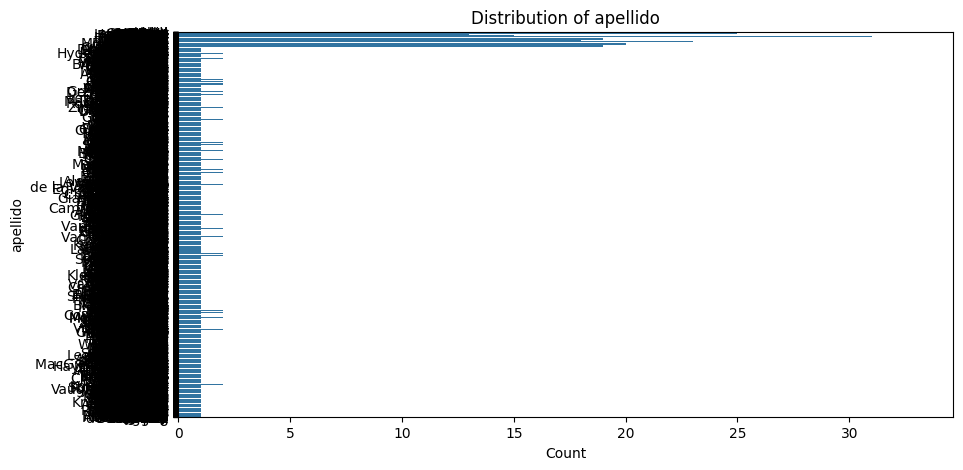

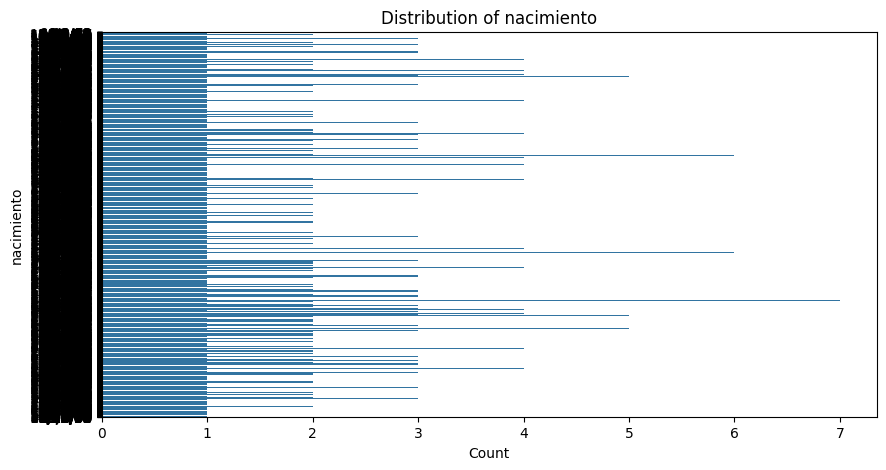

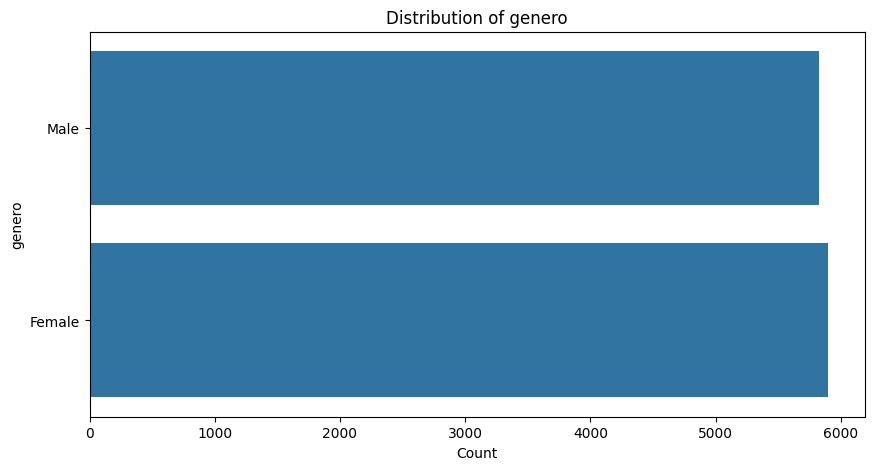

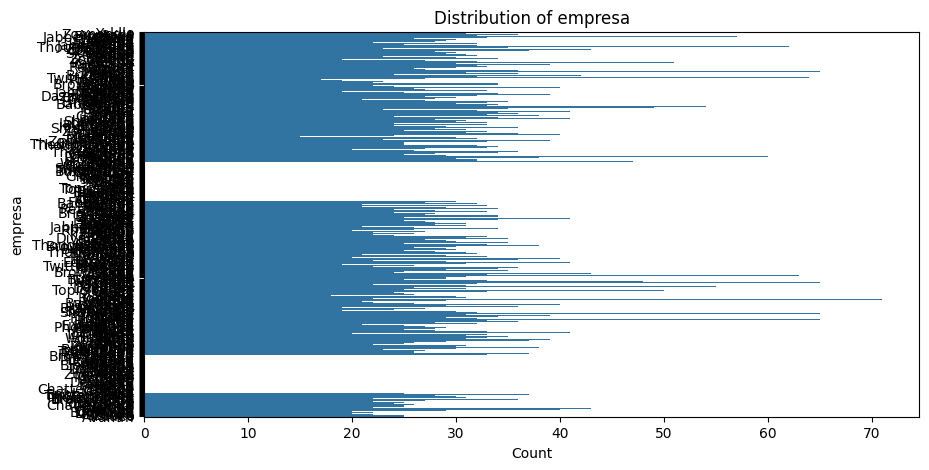

/home/diggspapu/Lab2/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diggspapu/Lab2/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


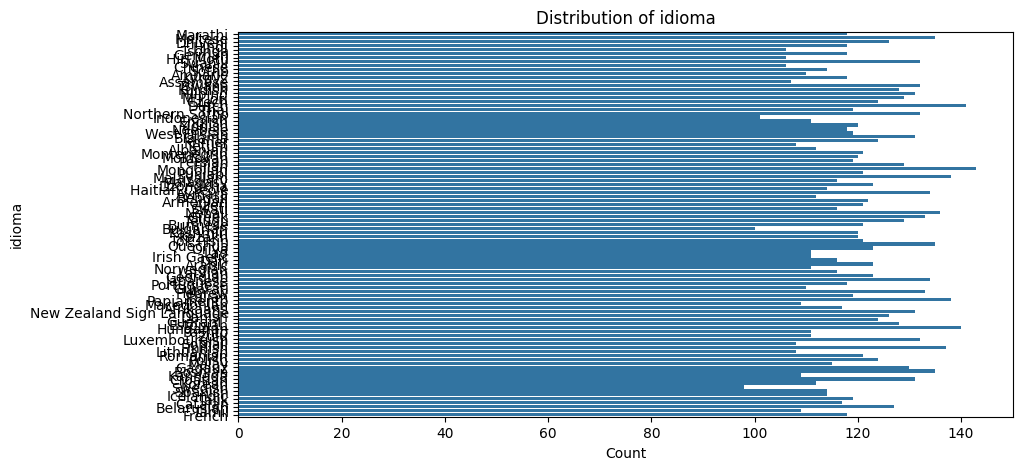

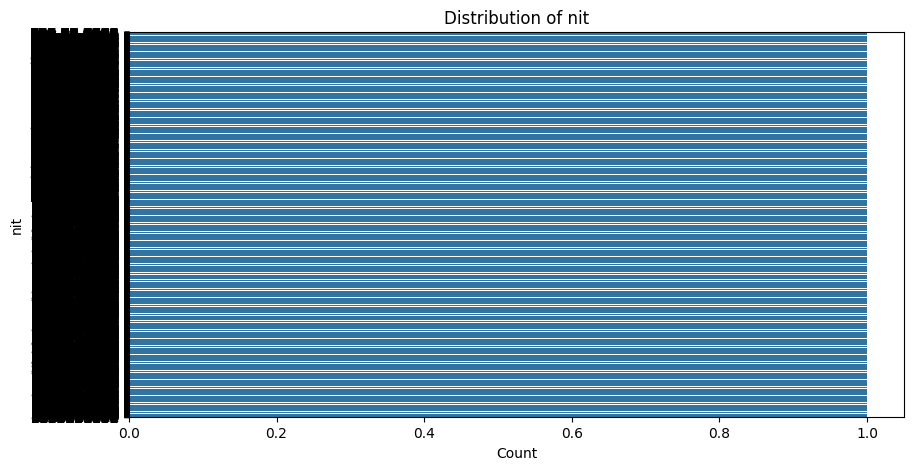

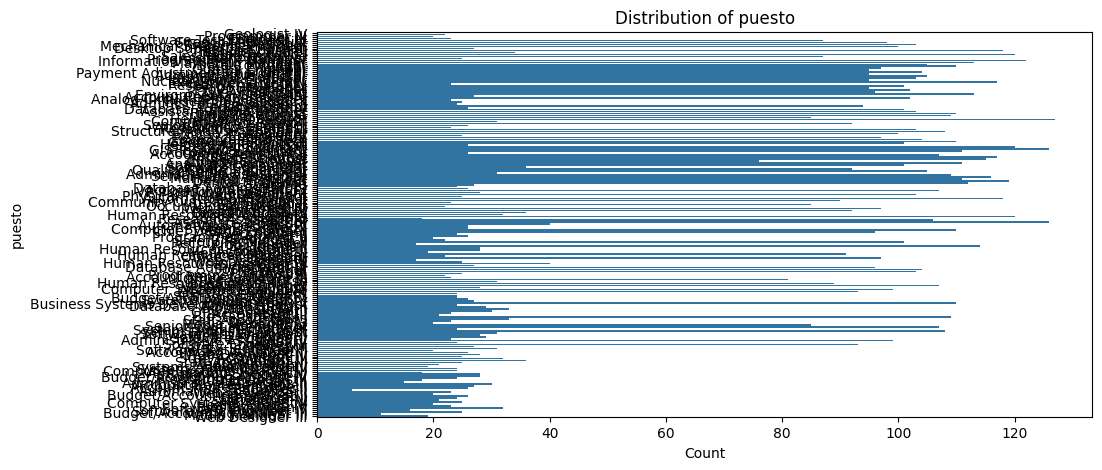

/home/diggspapu/Lab2/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 135 (\x87) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diggspapu/Lab2/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diggspapu/Lab2/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diggspapu/Lab2/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 137 (\x89) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diggspapu/Lab2/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diggspapu/Lab2/.venv/lib

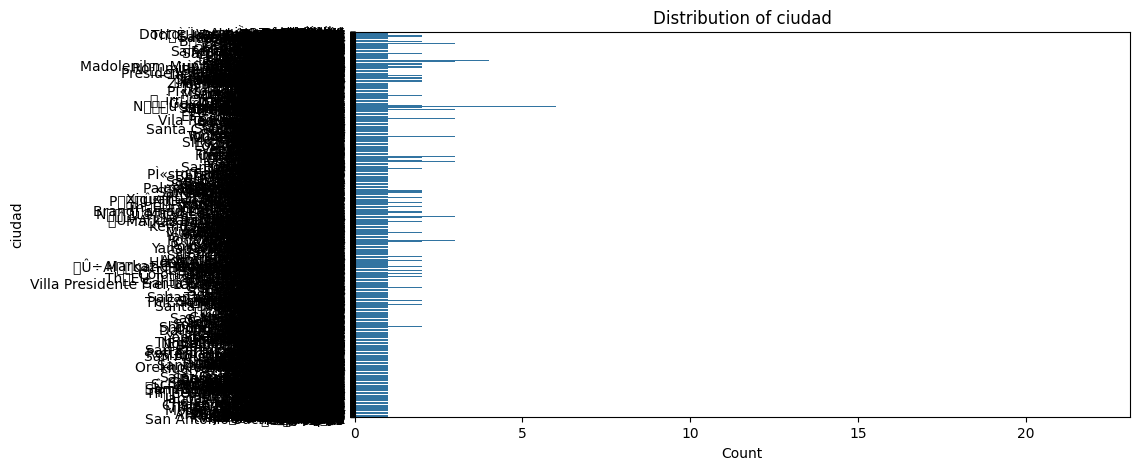

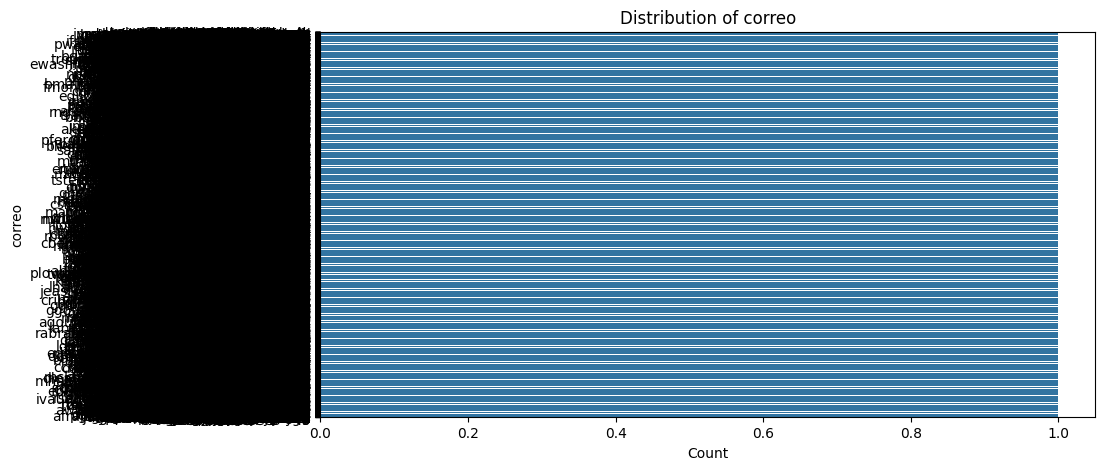

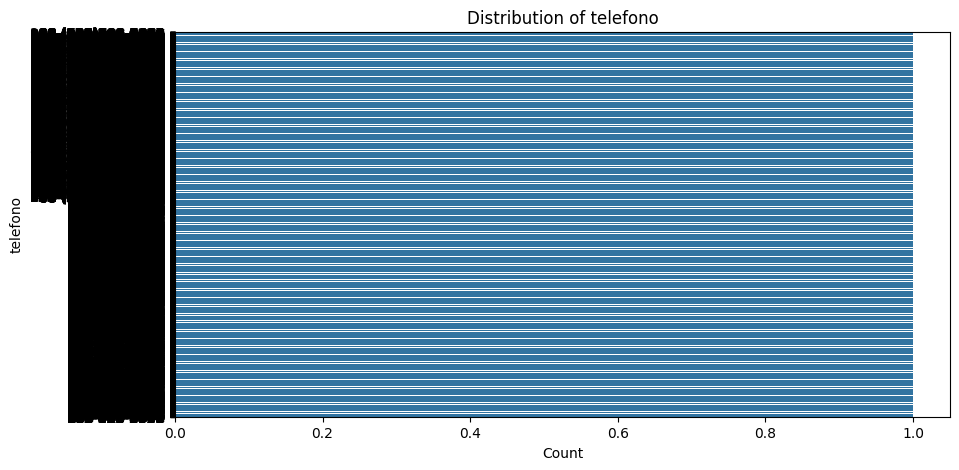

In [30]:
for key, df in dfs.items():
    print(f"File: {key}")
    display_distributions_stats(df)